In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [7]:
# Only get data analyst jobs in the USA
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the column for plotting
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])


df_DA_US['salary_year_avg'].sample(10)

770294    115000.0
320901     93000.0
595529    115000.0
362193     50000.0
552551     49500.0
587535     80000.0
506513    110000.0
100960     92500.0
178465    174040.0
307041    150000.0
Name: salary_year_avg, dtype: float64

<Axes: >

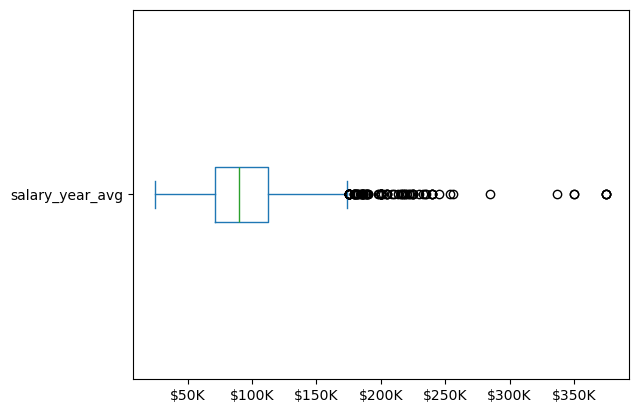

In [ ]:
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_US['salary_year_avg'].plot(kind='box', vert=False) # or plt.boxplot(df_DA_US['salary_year_avg'])

/var/folders/sn/5k2vs2c12gn62h66bq49knf00000gn/T/ipykernel_36281/2737567827.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


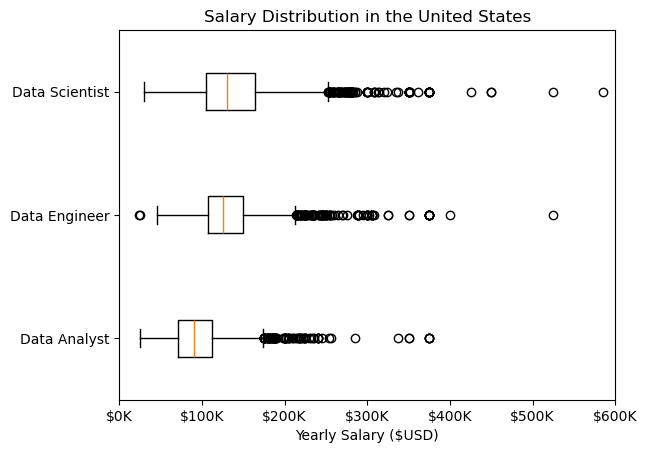

In [27]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

# filter the data to aggregate job_title
# only get data analysts jobs
df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

# df_US['job_title_short'].value_counts()
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.xlim(0, 600000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.show()